**Homework 4- Problem 2-2- With GRU**

In [1]:
!pip install d2l==1.0.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 KB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.9/120.9 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 39.8 MB/s eta 0:00:00


In [2]:
!pip install matplotlib
%matplotlib inline
!pip install matplotlib-inline
import sys
!{sys.executable} -m pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import torch
import time
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
import torch.optim as optim
%matplotlib inline
from torchvision import transforms
import torchvision.datasets as datasets
from torchvision import datasets, transforms
import torch.optim as optim
from d2l import torch as d2l
from torch.optim import lr_scheduler

In [13]:
class GRU(d2l.RNN): 
    def __init__(self, num_inputs, num_hiddens, num_layers, dropout=0):
        d2l.Module.__init__(self)
        self.save_hyperparameters()
        self.rnn = nn.GRU(num_inputs, num_hiddens, num_layers, dropout=dropout)

In [14]:
data = d2l.TimeMachine(batch_size=256, num_steps=32)
gru = GRU(num_inputs=len(data.vocab), num_hiddens=32, num_layers=2)
model = d2l.RNNLM(gru, vocab_size=len(data.vocab), lr=2)
model.predict('it has', 30, data.vocab)

/usr/local/lib/python3.9/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


'it hasllllllllllllllllllllllllllllll'

In [15]:
model

RNNLM(
  (rnn): GRU(
    (rnn): GRU(28, 32, num_layers=2)
  )
  (linear): Linear(in_features=32, out_features=28, bias=True)
)

In [16]:
pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
from torchinfo import summary
summary(model)

Layer (type:depth-idx)                   Param #
RNNLM                                    --
├─GRU: 1-1                               --
│    └─GRU: 2-1                          12,288
├─Linear: 1-2                            924
Total params: 13,212
Trainable params: 13,212
Non-trainable params: 0

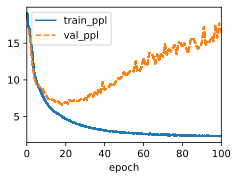

In [18]:
trainer = d2l.Trainer(max_epochs=100, gradient_clip_val=1, num_gpus=1)
trainer.fit(model, data)

In [19]:
model.predict('it has', 20, data.vocab, d2l.try_gpu())

'it hasiee is and any of th'

In [20]:
model.predict('it has', 100, data.vocab, d2l.try_gpu())

'it hasiee is and any of the drigensions of space become and he psychologist you conly corlusensions of spa'

In [22]:
model.predict('it has', 200, data.vocab, d2l.try_gpu())

'it hasiee is and any of the drigensions of space become and he psychologist you conly corlusensions of space become and he psychologist you conly corlusensions of space become and he psychologist you conly '